In [1]:
import numpy as np
from itertools import islice
import matplotlib.pyplot as plt

First the solutions that were evolved with the LB/UB encoding

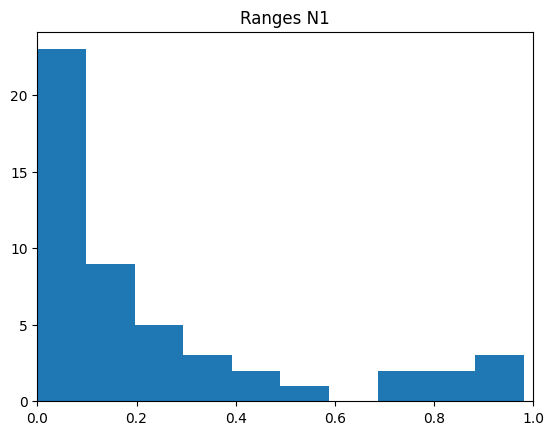

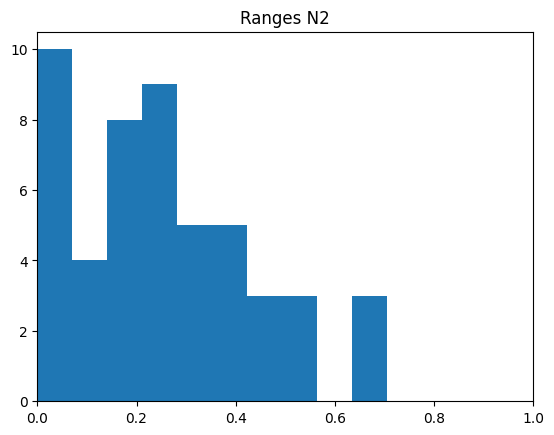

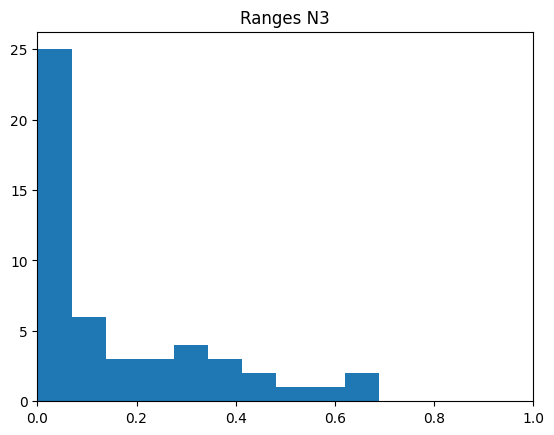

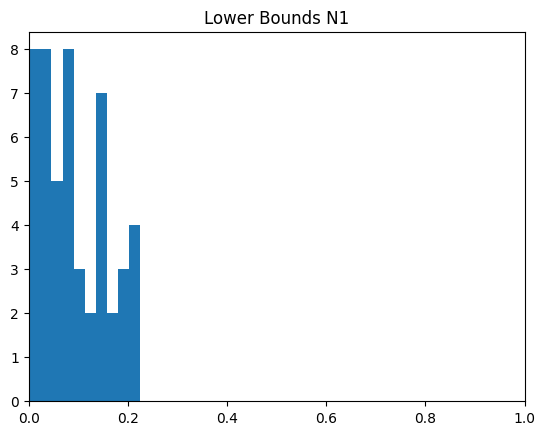

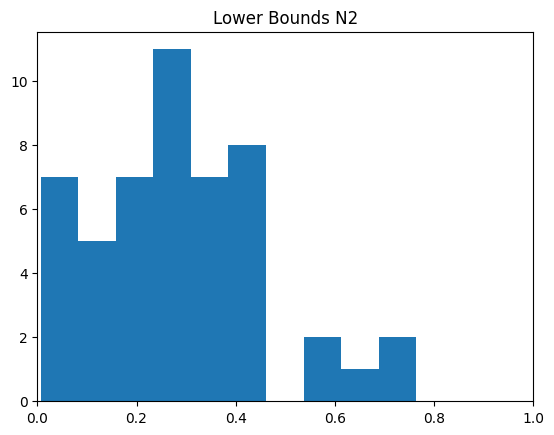

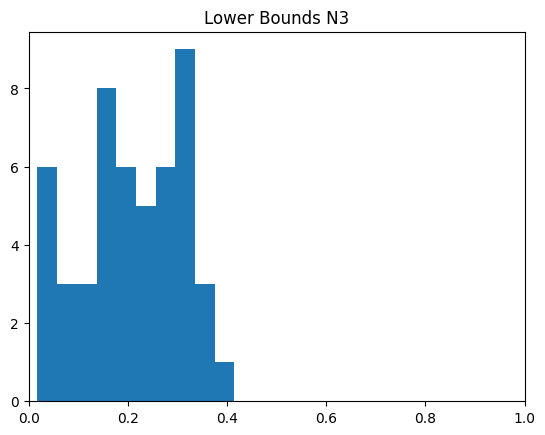

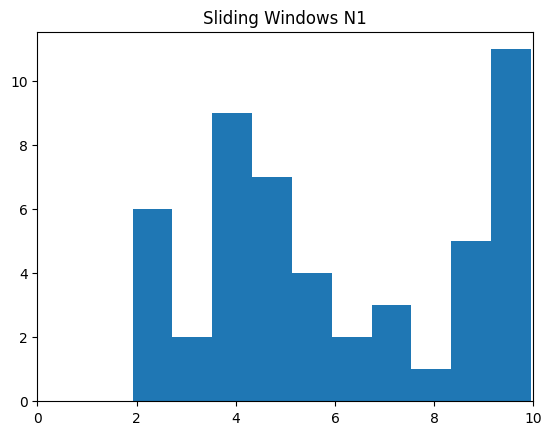

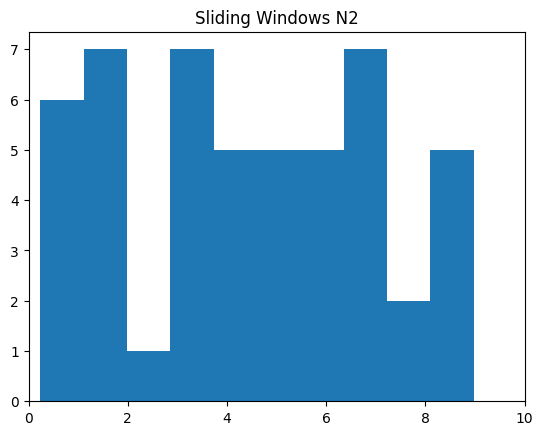

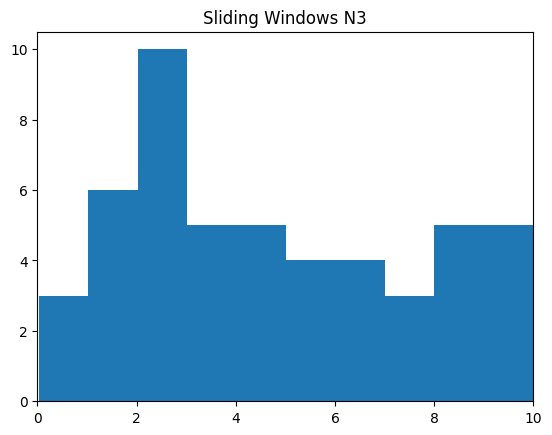

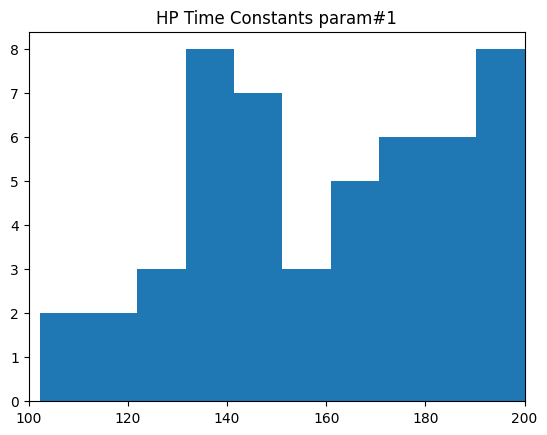

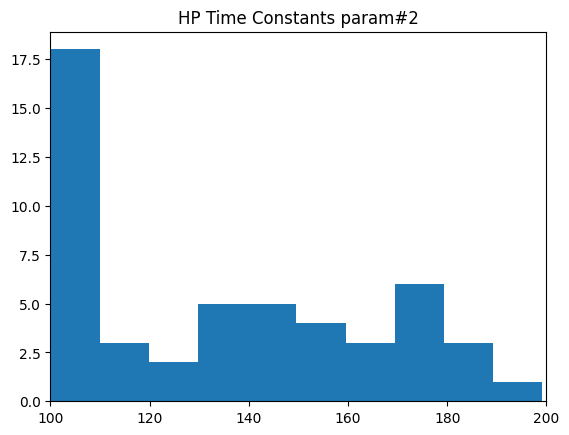

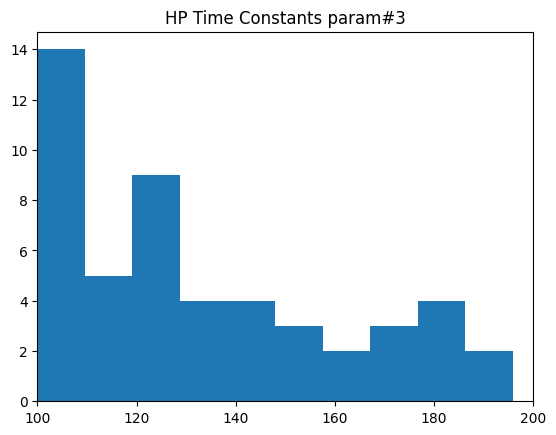

[28.3143 28.7536 25.5766 27.3962 29.9427 28.3088 28.5786 25.572  25.6259
 27.5185 28.415  25.6155 27.836  29.1434 27.9635 27.3218 28.4201 27.5871
 25.6013 28.5844 28.0022 28.0384 27.4743 28.3025 28.0874 27.6215 28.7985
 28.8559 28.4344 28.9844 27.1152 29.7128 27.8534 26.9906 25.5914 27.477
 27.9942 28.0742 28.6636 27.8989 27.7518 26.4313 27.1784 25.5612 27.8989
 26.2309 27.3336 30.0618 30.1167 28.0484]
MAX  (array([48]),)
MIN  (array([43]),)


In [32]:
N = 3 #number of *neurons* that are being plastically controlled
num_slns = 50
rangevals = np.zeros((N,num_slns))
squishnum = np.zeros((num_slns))
tauvals = np.zeros((N,num_slns))
LBvals = np.zeros((N,num_slns))
SWvals = np.zeros((N,num_slns))
fitnesses = np.zeros(num_slns)
for i in range(num_slns):
    filename = '../Cpp/%s/bestind.dat'%i
    with open(filename,"r") as f:
        plasticpars = np.loadtxt(islice(f, 1))
        num_params = (np.sum(plasticpars)).astype(int)
        [gen,phen] = np.loadtxt(islice(f, 2))
        fit = np.loadtxt(islice(f,3))
        fitnesses[i] = fit
        taus = phen[0:num_params]
        LBs = phen[N:2*N]
        ranges = phen[2*N:3*N] #range encoding
        SWs = phen[3*N:4*N]
        rangevals[:,i] = ranges
        tauvals[:,i] = taus
        LBvals[:,i] = LBs
        SWvals[:,i] = SWs
        for k in range(N):
            if ranges[k] < .05:
                squishnum[i] += 1

for i in range(N):
    plt.hist(rangevals[i])
    # plt.legend()
    plt.title('Ranges N%s'%(i+1))
    plt.xlim(0,1)
    plt.show()
for i in range(N):
    plt.hist(LBvals[i])
    # plt.legend()
    plt.title('Lower Bounds N%s'%(i+1))
    plt.xlim(0,1)
    plt.show()
for i in range(N):
    plt.hist(SWvals[i])
    # plt.legend()
    plt.title('Sliding Windows N%s'%(i+1))
    plt.xlim(0,10)
    plt.show()
for i in range(num_params):
    plt.hist(tauvals[i])
    # plt.legend()
    plt.title('HP Time Constants param#%s'%(i+1))
    plt.xlim(100,200)
    plt.show()

print(fitnesses)
print("MAX ",np.where(fitnesses==np.max(fitnesses)))
print("MIN ",np.where(fitnesses==np.min(fitnesses)))

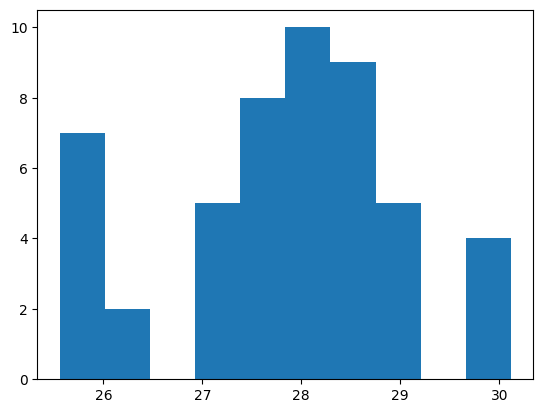

In [48]:
plt.hist(fitnesses)
plt.show()

In [49]:
#figure out which evolutions were just repeated
for i in range(len(tauvals[0])):
    if (len(np.where(tauvals[0,:] == tauvals[0,i])[0])>1) and len(np.where(tauvals[1,:] == tauvals[1,i])[0])>1:
        print(tauvals[0,i],np.where(tauvals[0,:] == tauvals[0,i]))

Plot (LB,UB) points to visualize clusters in HP parameter space

In [50]:
#so we can color the points based on relative fitness
norm_fitness = (fitnesses-min(fitnesses)+2)/(max(fitnesses)-min(fitnesses)+2)

In [20]:
xfunc = np.arange(0,1,.01)
UBvals = np.clip(LBvals+rangevals,a_min=0,a_max=1)
for i in range(N):
    plt.title('Neuron %s'%(i+1))
    plt.xlabel('Lower Bound')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.ylabel('Upper Bound')
    plt.plot(xfunc,xfunc,color='k')
    plt.scatter(LBvals[i],UBvals[i],color='tab:blue',alpha = norm_fitness)
    plt.scatter(LBvals[i,48],UBvals[i,48],color='g') #best solution
    plt.scatter(LBvals[i,43],UBvals[i,43],color='r') #worst solution
    plt.show()



NameError: name 'LBvals' is not defined

This time, fit solutions are often not squished against the equality line, but bad solutions are often far off it. Further comparison of these solutions to the solutions where bias 2 wasn't allowed to change? --> very similar values!

Last time, I discovered that the success of the HP mechanism cannot be explained by where the mechanism would "turn off" because there is usually nowhere where it would turn off, and even a little bit of change in a consistent manner is enough to move you off a point. Instead, where would its movement cancel out on average (for BOTH neurons)? At a minimum, this requires a limit cycle.

If you're an experimentalist, you could still measure general parameter configurations where the activations never exceed a certain magnitude, but this would be hard to tell from areas where things are just slow, but the solution will never return to that point again. And the magnitude isn't low because it would be theoretically low if you were to pretend HP was infinitely slow. Just because the trajectories are organized to double back on themselves. 

HOW MANY RANDOMLY GENERATED SOLUTIONS ARE MADE PYLORIC BY THE BEST EVOLVED HP IN EACH DIMENSION?

In [18]:
#going without the taus set
rand2D = np.loadtxt('../Cpp/Functioning2D/TestonRandomSolutions/FinalFitness33.dat')
rand3D = np.loadtxt('../Cpp/Test3DHPonRandomSolutions/FinalFitness3D_48.dat')
rand4D = np.loadtxt('../Cpp/Test4DHPonRandomSolutions/FinalFitness4D_101.dat')
rand5D= np.loadtxt('../Cpp/Test5DHPonRandomSolutions/FinalFitness5D_206.dat')
# rand6D= np.loadtxt('../Cpp/Test6DHPonRandomSolutions/FinalFitness6D_30x.dat')
# rand2D_tauset = np.loadtxt('../Cpp/Functioning2D/TestonRandomSolutions/FinalFitness33_tausset.dat')
rand3D_tausset = np.loadtxt('../Cpp/Test3DHPonRandomSolutions/FinalFitness3D_48_tausset.dat')
rand4D_tausset = np.loadtxt('../Cpp/Test4DHPonRandomSolutions/FinalFitness4D_101_tausset.dat')
rand5D_tausset = np.loadtxt('../Cpp/Test5DHPonRandomSolutions/FinalFitness5D_206_tausset.dat')

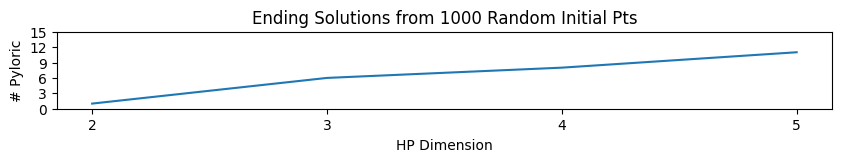

In [19]:
pyl = [len(np.where(rand2D>.3)[0]),len(np.where(rand3D>.3)[0]),len(np.where(rand4D>.3)[0]),len(np.where(rand5D>.3)[0])]
osc = [len(np.where(rand2D>=.15)[0]),len(np.where(rand3D>=.15)[0]),len(np.where(rand4D>=.15)[0]),len(np.where(rand5D>=.15)[0])]
x = np.arange(2,6).astype(int)
y = np.arange(0,16,3).astype(int)
plt.figure(figsize=(10,1))
plt.plot(x,pyl,label='pyloric')
# plt.plot(x,osc,label='oscillating')
plt.xticks(x)
plt.yticks(y)
plt.xlabel('HP Dimension')
plt.ylabel('# Pyloric')
plt.title('Ending Solutions from 1000 Random Initial Pts')
# plt.legend()
plt.show()

In [13]:
print(len(np.where(rand2D>.3)[0]))
print(len(np.where(rand3D_tausset>.3)[0]))
print(len(np.where(rand4D_tausset>.3)[0]))
print(len(np.where(rand5D_tausset>.3)[0]))

1
18
0
1


In [74]:
dimensions = [2,3,4,5]
indivs = ['Pete','Quinn','Ronn','Sven']
HPs = ['33','48','101','206']
pts = 1000
pyl = np.zeros((len(dimensions),len(indivs),pts))

for i in range(len(indivs)):
    pyl[0,i,:] = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/%sFinalFitnesses%s.dat'%(indivs[i],HPs[0]))
    pyl[1,i,:] = np.loadtxt('../Cpp/Test3DHPonPyloricSolutions/%sFinalFitness3D_%s.dat'%(indivs[i],HPs[1]))
    pyl[2,i,:] = np.loadtxt('../Cpp/Test4DHPonPyloricSolutions/%sFinalFitness4D_%s.dat'%(indivs[i],HPs[2]))
    pyl[3,i,:] = np.loadtxt('../Cpp/Test5DHPonPyloricSolutions/%sFinalFitness5D_%s.dat'%(indivs[i],HPs[3]))



FileNotFoundError: ../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/QuinnFinalFitnesses33.dat not found.

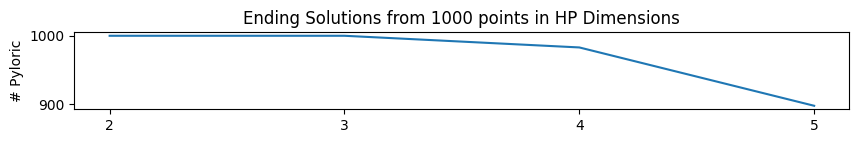

In [15]:
pylcountdata=[len(np.where(pyl[]>.3)[0]),len(np.where(pyl3D>.3)[0]),len(np.where(pyl4D>.3)[0]),len(np.where(pyl5D>.3)[0])]
x = np.arange(2,6).astype(int)
plt.figure(figsize=(10,1))
for i in range(4):
    plt.plot(x,pylcountdata[])
plt.xticks(x)
plt.title('Ending Solutions from 1000 points in HP Dimensions')
plt.ylabel('# Pyloric')
plt.show()

In [33]:
#What about comparing the ranges from 3D, 4D, and 5D solutions?

N = 3 #number of *neurons* that are being plastically controlled
num_slns = 50
rangevals = np.zeros((N,num_slns))
squishnum = np.zeros((num_slns))
tauvals = np.zeros((N,num_slns))
LBvals = np.zeros((N,num_slns))
SWvals = np.zeros((N,num_slns))
fitnesses = np.zeros(num_slns)
for i in range(num_slns):
    filename = '../Cpp/%s/bestind.dat'%i
    with open(filename,"r") as f:
        plasticpars = np.loadtxt(islice(f, 1))
        num_params = (np.sum(plasticpars)).astype(int)
        [gen,phen] = np.loadtxt(islice(f, 2))
        fit = np.loadtxt(islice(f,3))
        fitnesses[i] = fit
        taus = phen[0:num_params]
        LBs = phen[N:2*N]
        ranges = phen[2*N:3*N] #range encoding
        SWs = phen[3*N:4*N]
        rangevals[:,i] = ranges
        tauvals[:,i] = taus
        LBvals[:,i] = LBs
        SWvals[:,i] = SWs
        for k in range(N):
            if ranges[k] < .05:
                squishnum[i] += 1

tauvals3D = tauvals
LBvals3D = LBvals
rangevals3D = rangevals
SWvals3D = SWvals
fitnesses3D = fitnesses


In [46]:
#4D
num_slns = 10
num_params = 4
rangevals4D = np.zeros((N,num_slns))
squishnum = np.zeros((num_slns))
tauvals4D = np.zeros((num_params,num_slns))
LBvals4D = np.zeros((N,num_slns))
SWvals4D = np.zeros((N,num_slns))
fitnesses4D = np.zeros(num_slns)
for i in range(num_slns):
    filename = '../Cpp/%s/bestind.dat'%(100+i)
    with open(filename,"r") as f:
        plasticpars = np.loadtxt(islice(f, 1))
        # num_params = (np.sum(plasticpars)).astype(int)
        [gen,phen] = np.loadtxt(islice(f, 2))
        fit = np.loadtxt(islice(f,3))
        fitnesses4D[i] = fit
        taus4D = phen[0:num_params]
        LBs4D = phen[num_params:num_params+N]
        ranges4D = phen[num_params+N:num_params+(2*N)] #range encoding
        SWs4D = phen[num_params+(2*N):num_params+(3*N)]
        rangevals4D[:,i] = ranges4D
        tauvals4D[:,i] = taus4D
        LBvals4D[:,i] = LBs4D
        SWvals4D[:,i] = SWs4D
        for k in range(N):
            if ranges4D[k] < .05:
                squishnum[i] += 1

In [48]:
#5D
num_slns = 10
num_params = 5
rangevals5D = np.zeros((N,num_slns))
squishnum = np.zeros((num_slns))
tauvals5D = np.zeros((num_params,num_slns))
LBvals5D = np.zeros((N,num_slns))
SWvals5D = np.zeros((N,num_slns))
fitnesses5D = np.zeros(num_slns)
for i in range(num_slns):
    filename = '../Cpp/%s/bestind.dat'%(200+i)
    with open(filename,"r") as f:
        plasticpars = np.loadtxt(islice(f, 1))
        num_params = (np.sum(plasticpars)).astype(int)
        [gen,phen] = np.loadtxt(islice(f, 2))
        fit = np.loadtxt(islice(f,3))
        fitnesses5D[i] = fit
        taus = phen[0:num_params]
        LBs = phen[num_params:num_params+N]
        ranges = phen[num_params+N:num_params+(2*N)] #range encoding
        SWs = phen[num_params+(2*N):num_params+(3*N)]
        rangevals5D[:,i] = ranges
        tauvals5D[:,i] = taus
        LBvals5D[:,i] = LBs
        SWvals5D[:,i] = SWs
        for k in range(N):
            if ranges[k] < .05:
                squishnum[i] += 1

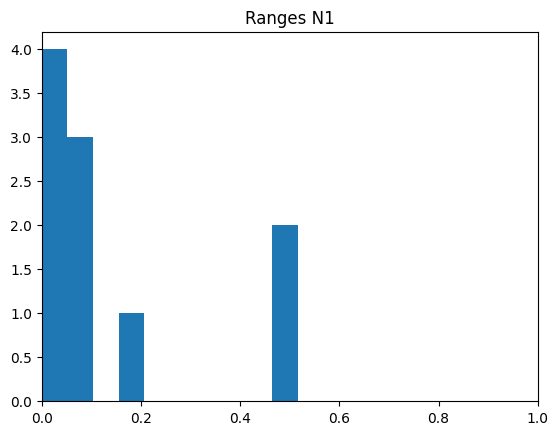

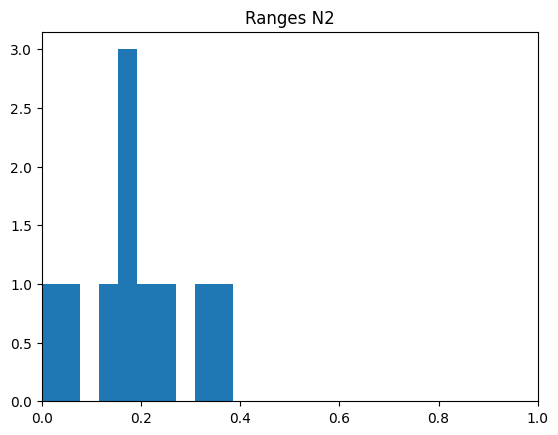

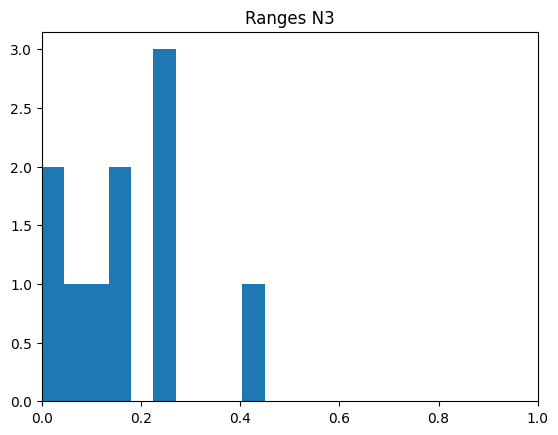

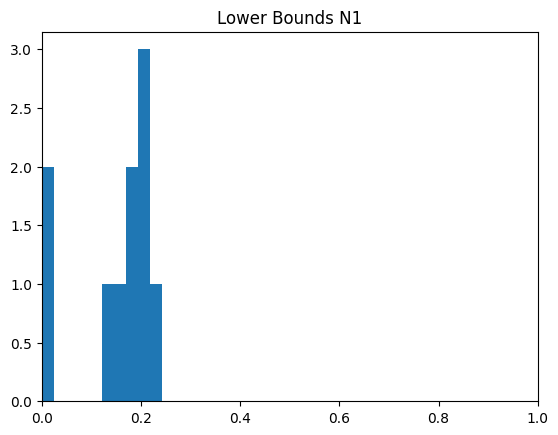

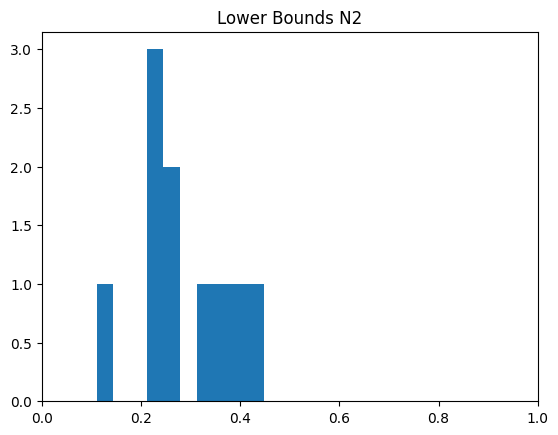

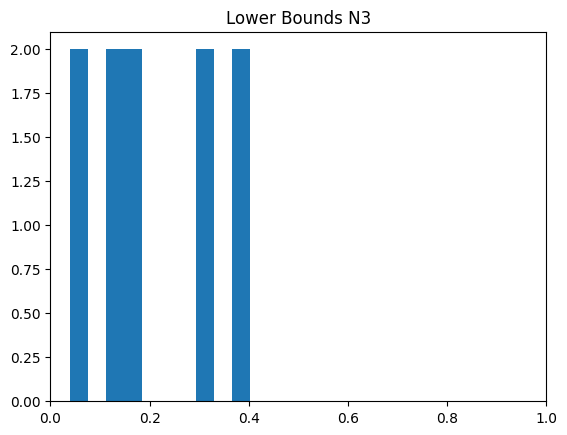

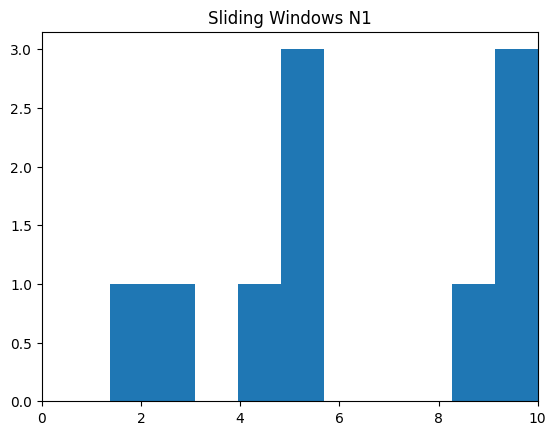

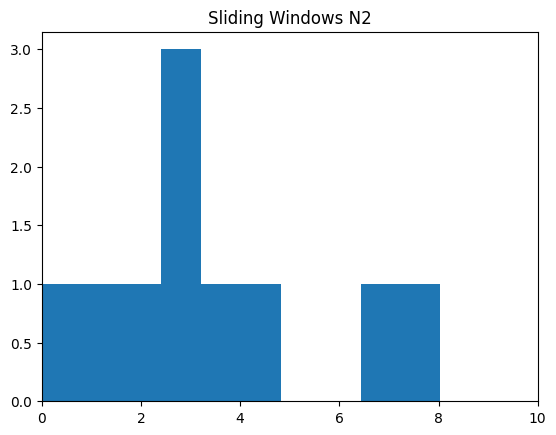

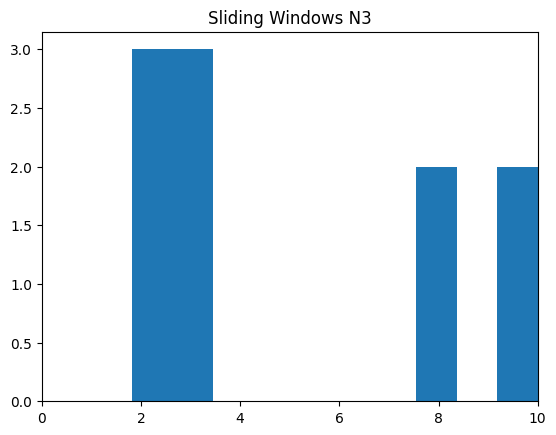

In [49]:
for i in range(N):
    plt.hist(rangevals4D[i])
    # plt.legend()
    plt.title('Ranges N%s'%(i+1))
    plt.xlim(0,1)
    plt.show()
for i in range(N):
    plt.hist(LBvals4D[i])
    # plt.legend()
    plt.title('Lower Bounds N%s'%(i+1))
    plt.xlim(0,1)
    plt.show()
for i in range(N):
    plt.hist(SWvals4D[i])
    # plt.legend()
    plt.title('Sliding Windows N%s'%(i+1))
    plt.xlim(0,10)
    plt.show()
# for i in range(num_params):
#     plt.hist(tauvals4D[i])
#     # plt.legend()
#     plt.title('HP Time Constants param#%s'%(i+1))
#     plt.xlim(100,200)
#     plt.show()

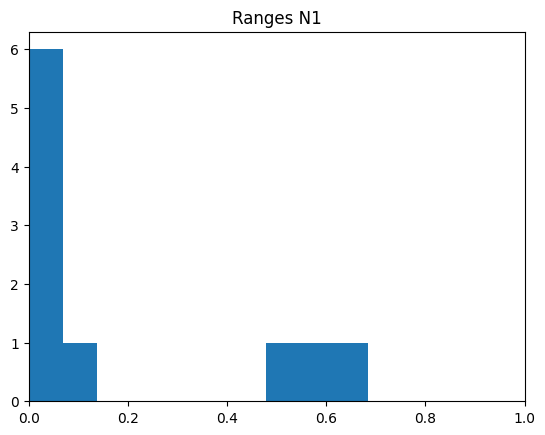

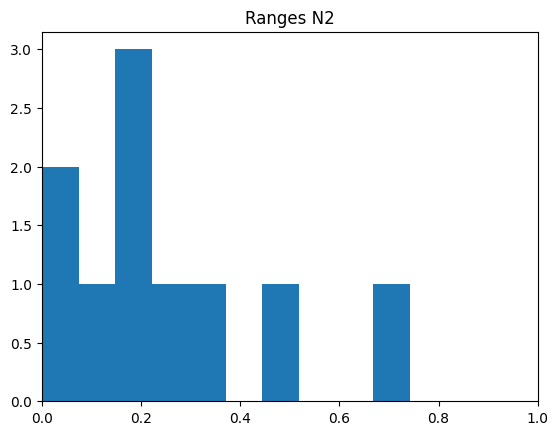

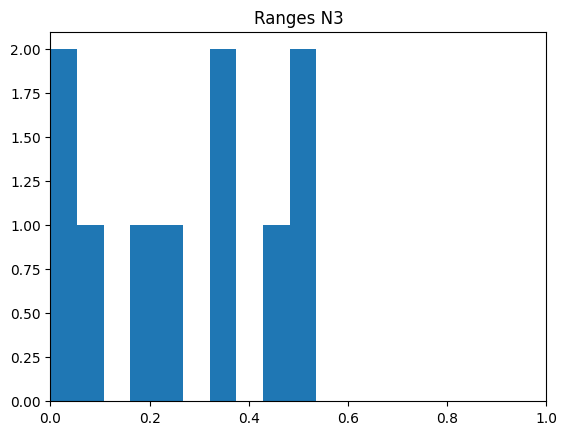

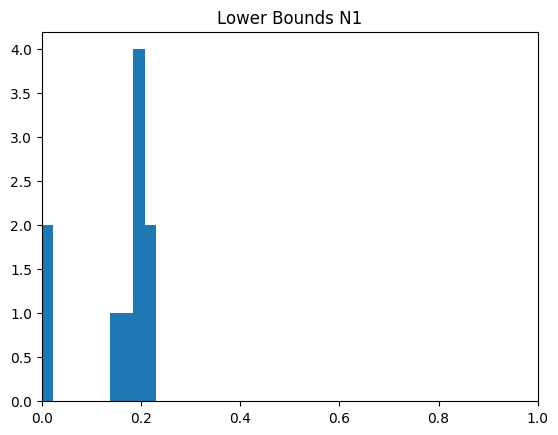

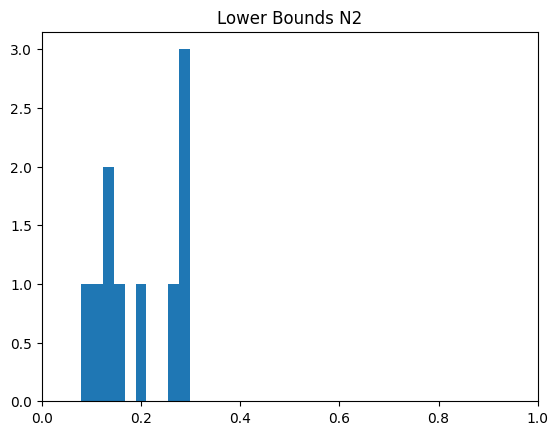

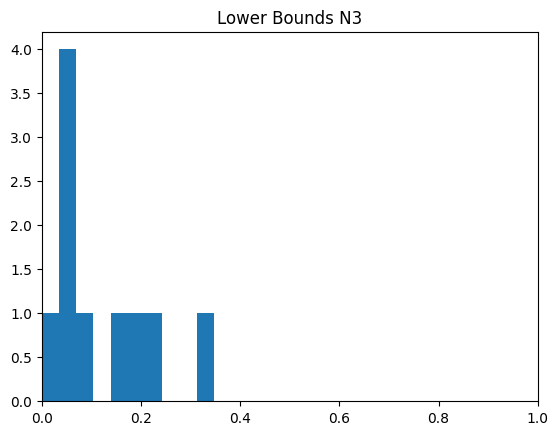

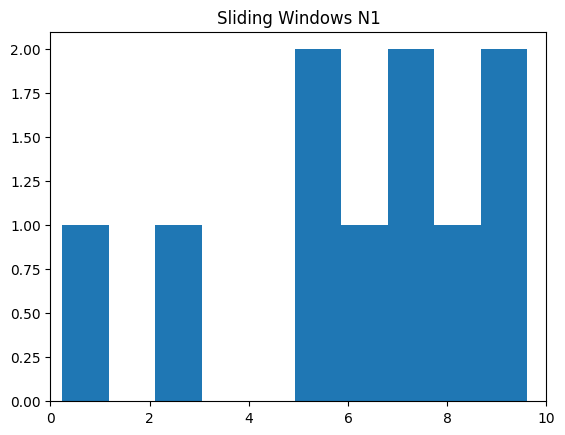

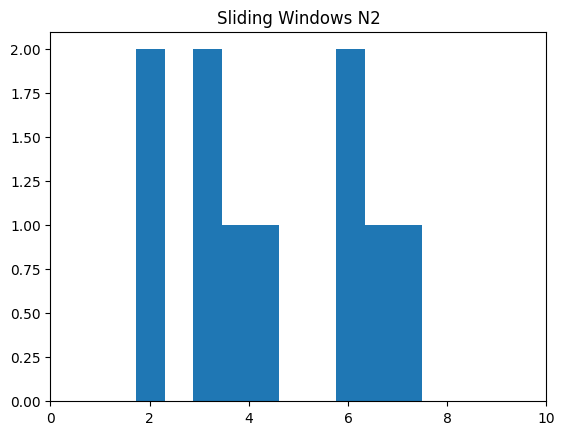

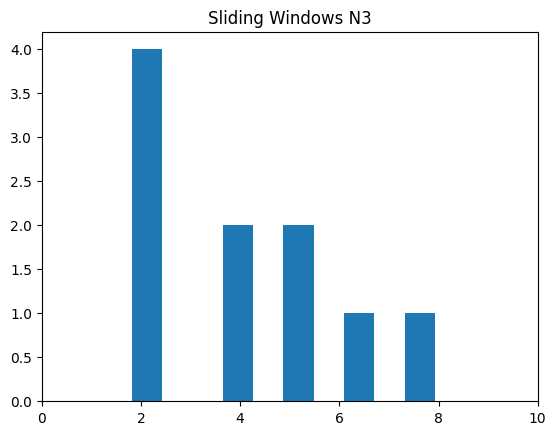

In [50]:
for i in range(N):
    plt.hist(rangevals5D[i])
    # plt.legend()
    plt.title('Ranges N%s'%(i+1))
    plt.xlim(0,1)
    plt.show()
for i in range(N):
    plt.hist(LBvals5D[i])
    # plt.legend()
    plt.title('Lower Bounds N%s'%(i+1))
    plt.xlim(0,1)
    plt.show()
for i in range(N):
    plt.hist(SWvals5D[i])
    # plt.legend()
    plt.title('Sliding Windows N%s'%(i+1))
    plt.xlim(0,10)
    plt.show()
# for i in range(num_params):
#     plt.hist(tauvals4D[i])
#     # plt.legend()
#     plt.title('HP Time Constants param#%s'%(i+1))
#     plt.xlim(100,200)
#     plt.show()

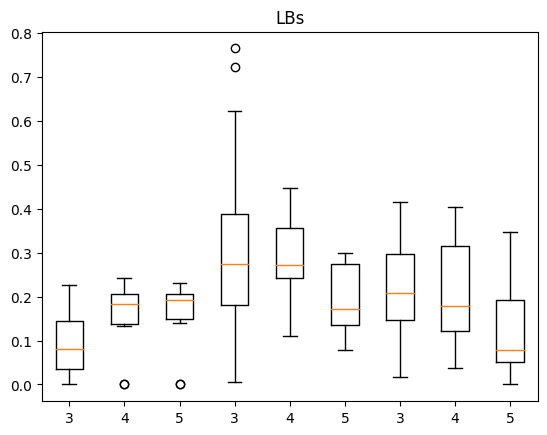

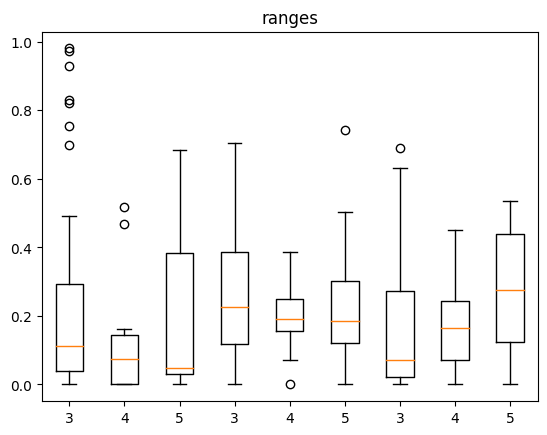

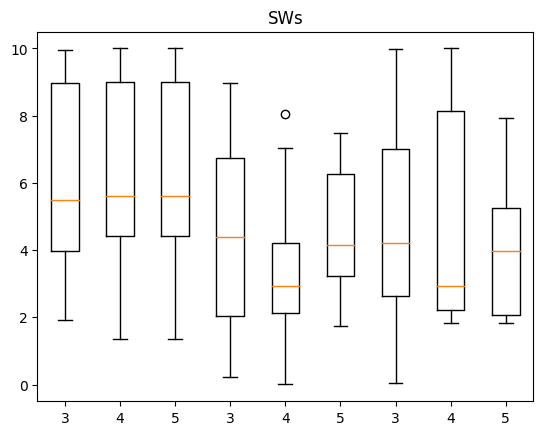

In [65]:
LBdata=[LBvals3D[0],LBvals4D[0],LBvals5D[0],LBvals3D[1],LBvals4D[1],LBvals5D[1],LBvals3D[2],LBvals4D[2],LBvals5D[2]]
rangedata = [rangevals3D[0],rangevals4D[0],rangevals5D[0],rangevals3D[1],rangevals4D[1],rangevals5D[1],rangevals3D[2],rangevals4D[2],rangevals5D[2]]
SWdata = [SWvals3D[0],SWvals4D[0],SWvals4D[0],SWvals3D[1],SWvals4D[1],SWvals5D[1],SWvals3D[2],SWvals4D[2],SWvals5D[2]]
# print(data4D)
plt.boxplot(LBdata)
plt.xticks([1,2,3,4,5,6,7,8,9],[3,4,5,3,4,5,3,4,5])
plt.title('LBs')
plt.show()
plt.boxplot(rangedata)
plt.xticks([1,2,3,4,5,6,7,8,9],[3,4,5,3,4,5,3,4,5])
plt.title('ranges')
plt.show()
plt.boxplot(SWdata)
plt.xticks([1,2,3,4,5,6,7,8,9],[3,4,5,3,4,5,3,4,5])
plt.title('SWs')
plt.show()

